In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import layers as net
%matplotlib inline

In [3]:
# aux funtion
def plotData(x,y):
    plt.plot(x,y,'or');
    plt.ylabel('Profit in $10,000s');
    plt.xlabel('Population of City in 10,000s');
    plt.grid(1)

def plotLoss(J):
    plt.plot(J);
    plt.ylabel('J(x)');
    plt.xlabel('epoch');
    plt.grid(1)
    

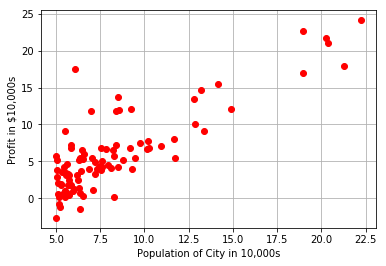

In [4]:
# Load data
datas = np.loadtxt('data.txt', delimiter=',');
Xo = datas[:,0]; y = datas[:,1];
m = len(y);

# plot data
plotData(Xo,y);

In [5]:
# Create cost function neural netword
# Demo
#         +--------+            +--------+
#   ----> | inner  |--> (*)---> | loss   |
#         +--------+            +--------+

# Const function
def costFunc( x, w1):

    m  = x.shape[0];
    z = 0.0; 
    for i in range(m):       
        z1 = x[i,:].T;
        z += net.inner().forward({'x':z1, 'w':w1}) 
    return z/m;

# Gradind function
def gradCostFunc(x, y, w1):
    
    m  = x.shape[0];
    dEdW1 = 0.0; E = 0.0;
    for i in range(m):

        # forward --->
        z1 = np.matrix(x[i,:]).T; yi = np.matrix(y[i]);   
        z2 = net.inner().forward({'x':z1, 'w':w1})         
        z = net.loss().forward({'x':z2, 'y':yi});
        E += z;
        
        # <--- backward
        l4 = [1];
        l3 = net.loss().backward({'x':z2, 'y':yi, 'dzdx':l4} );    
        _ , dEdW1_i = net.inner().backward({'x':z1, 'w':w1, 'dzdx':l3});

        dEdW1 += dEdW1_i;

    return E/m, dEdW1/m

def loss(y,y_):
    m  = len(y);
    e = 0.0;
    for i in range(m):
        e += net.loss().forward({'x':np.matrix(y_[i]), 'y':np.matrix(y[i])});
    return e/m;

  


In [6]:
# Performs gradient descent to learn theta
def gradDescent(x,y,w1, alpha, numiter):
    
    E_h = np.zeros((numiter,1), dtype=np.float32); 
    for i in range(numiter):
        E, dEdW1 = gradCostFunc(X, y, w1);
        w1 = w1 - alpha*dEdW1;
        
        E_h[i] = E;
        #print('E = {} dEdW = {}'.format(E, dEdW1));

    return w1, E_h;

In [11]:
# Running Gradient Descent
X = np.concatenate((np.ones((m,1)),Xo.reshape(m,1)),axis=1)

# Wrigth initialization
# w1 = np.random.randn(1,2);
w1 = np.zeros((1,2), dtype=np.float32);

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

theta, j = gradDescent(X,y,w1, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: {:.2f} {:.2f}'.format(theta[0,0], theta[0,1]));

Theta found by gradient descent: -3.63 1.17


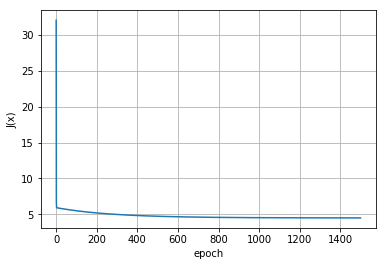

In [12]:
# Plot error
plotLoss(j)
plt.show()

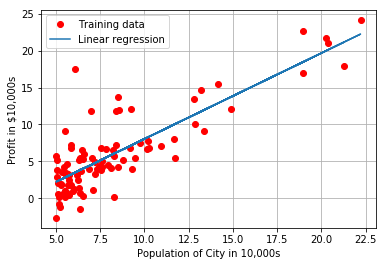

In [13]:
# Plot the linear fit
plotData(Xo,y);
plt.plot(X[:,1], X*theta.T, '-')
plt.legend(['Training data', 'Linear regression'])
plt.show()

In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta.T;
print('For population = 35,000, we predict a profit of {}'.format(predict1*10000));
predict2 = [1, 7] * theta.T;
print('For population = 70,000, we predict a profit of {}'.format(predict2*10000));

For population = 35,000, we predict a profit of [[ 4519.7678677]]
For population = 70,000, we predict a profit of [[ 45342.45012945]]
